<a href="https://colab.research.google.com/github/Parkdongmin47/F1_-.ipynb/blob/main/F1_%EB%B0%95%EB%8F%99%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [13]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
model = keras.Sequential()

In [15]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [16]:
model.add(keras.layers.MaxPooling2D(2))

In [17]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               627300    
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                      

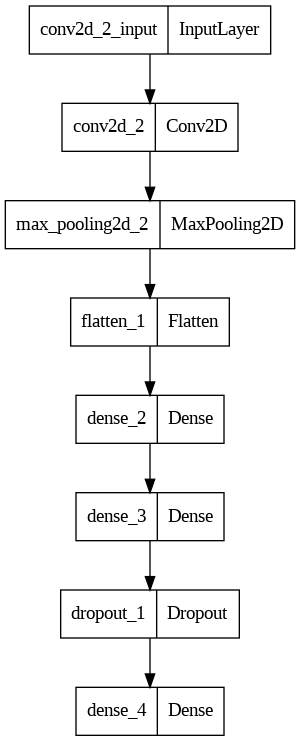

In [19]:
keras.utils.plot_model(model)

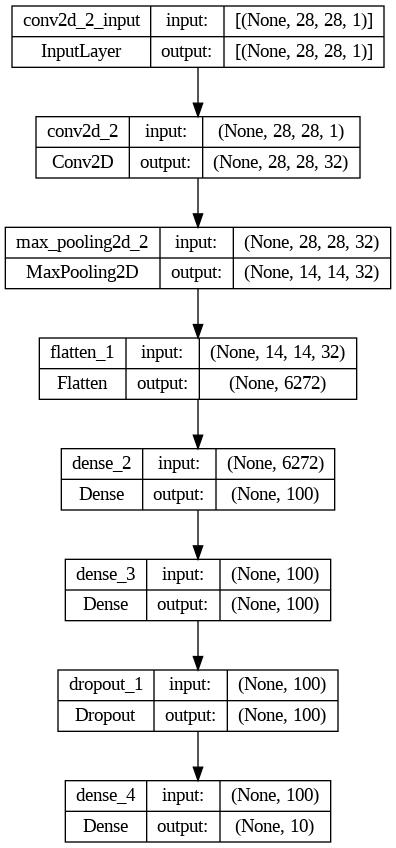

In [20]:
keras.utils.plot_model(model, show_shapes=True)

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 42s 27ms/step - loss: 0.4672 - accuracy: 0.8364 - val_loss: 0.3050 - val_accuracy: 0.8848
Epoch 2/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2956 - accuracy: 0.8937 - val_loss: 0.2724 - val_accuracy: 0.8998
Epoch 3/20
1500/1500 [==============================] - 41s 27ms/step - loss: 0.2554 - accuracy: 0.9072 - val_loss: 0.2544 - val_accuracy: 0.9070
Epoch 4/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2199 - accuracy: 0.9194 - val_loss: 0.2532 - val_accuracy: 0.9093
Epoch 5/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.1925 - accuracy: 0.9292 - val_loss: 0.2576 - val_accuracy: 0.9106
Epoch 6/20
1500/1500 [==============================] - 38s 26ms/step - loss: 0.1691 - accuracy: 0.9378 - val_loss: 0.2542 - val_accuracy: 0.9148


In [23]:
import matplotlib.pyplot as plt

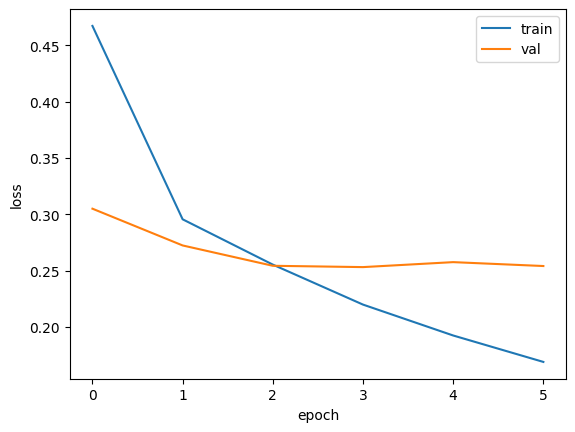

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [25]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.2532 - accuracy: 0.9093


[0.25320175290107727, 0.909333348274231]

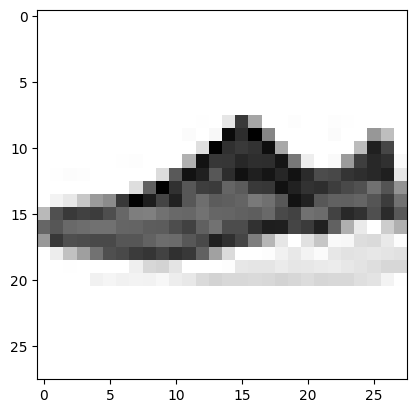

In [33]:
plt.imshow(val_scaled[2].reshape(28, 28), cmap='gray_r')
plt.show()

In [53]:
preds = model.predict(val_scaled[2:3])
print(preds)

1/1 [==============================] - 0s 31ms/step
[[1.6346665e-07 7.1028952e-09 2.7328387e-08 3.2148243e-08 6.4284620e-08
  5.5227694e-05 4.7978915e-08 9.9987853e-01 1.1940362e-07 6.5771041e-05]]


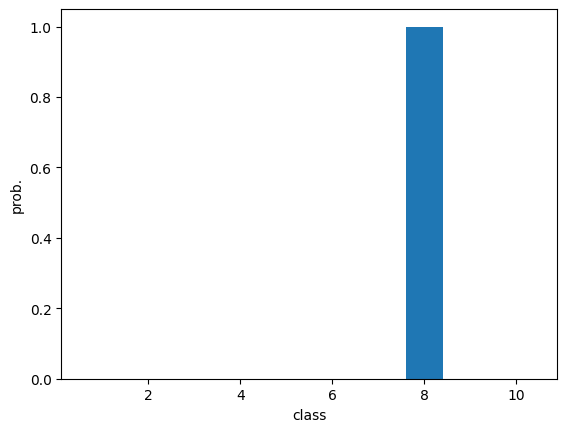

In [54]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [55]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [56]:
import numpy as np
print(classes[np.argmax(preds)])

스니커즈


In [57]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [58]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 9ms/step - loss: 0.2672 - accuracy: 0.9019


[0.2672100067138672, 0.9018999934196472]